## Описание данных
---
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Предобработка данных

In [ ]:
import pandas as pd
import numpy as np
from nltk.stem import SnowballStemmer 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/da-0-data.csv')

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [ ]:
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

Необходимо определить наличие пропусков в данных и заполнить их (при необходимости).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [ ]:
df['days_employed'] = df['days_employed'].fillna(0)

In [ ]:
df[df['total_income'].isna()]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

In [ ]:
df.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [ ]:
df[df['total_income'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [ ]:
dataS = df.copy()

In [ ]:
dataS['total_income'] = dataS['total_income'].fillna(0)

In [ ]:
dataS.loc[dataS['total_income'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,0.0,65,среднее,1,гражданский брак,1,M,пенсионер,0,0.0,сыграть свадьбу
26,0,0.0,41,среднее,1,женат / замужем,0,M,госслужащий,0,0.0,образование
29,0,0.0,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,0.0,строительство жилой недвижимости
41,0,0.0,50,среднее,1,женат / замужем,0,F,госслужащий,0,0.0,сделка с подержанным автомобилем
55,0,0.0,54,среднее,1,гражданский брак,1,F,пенсионер,1,0.0,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,0.0,47,Среднее,1,женат / замужем,0,M,компаньон,0,0.0,сделка с автомобилем
21495,1,0.0,50,среднее,1,гражданский брак,1,F,сотрудник,0,0.0,свадьба
21497,0,0.0,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,0.0,строительство недвижимости
21502,1,0.0,42,среднее,1,женат / замужем,0,F,сотрудник,0,0.0,строительство жилой недвижимости


In [ ]:
def incomer(row):
    total = row['total_income']
    itype = row['income_type']
    
    if itype == 'сотрудник':
        if total == 0:
            return 142594.396847
    elif itype == 'компаньон':
        if total == 0:
            return 172357.950966
    elif itype == 'пенсионер':
        if total == 0:
            return 118514.486412
    elif itype == 'госслужащий':
        if total == 0:
            return 150447.935283
    elif itype == 'предприниматель':
        if total == 0:
            return 499163.144947

In [ ]:
dataS['total'] = dataS.apply(incomer, axis = 1)

In [ ]:
df['total_income'] = df['total_income'].fillna(dataS['total'])

In [ ]:
df['total_income'].isna().sum()

0

In [ ]:
df.loc[df['total_income'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [ ]:
df.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

Заполнил пропуски total_income медианным значением в зависимости от группы income_type.

## Замена типа данных

In [ ]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')

In [ ]:
df['days_employed'] = df['days_employed'].abs()

Выводы: 
- в связи с тем, что количество дней, которые сотрудник работает в компании не может быть не целым числом (или же нам не нужна настолько точная информация об этом), данные были заменены на целочисленные;

- так же нет необходимости знать зарплату сотрудника до копейки (если предположить, что зарплата здесь указана в рублях);

- так же привел days_employed к модулю, так как отрицательного значения не может быть (ошибка внесения?).

## Обработка дубликатов

In [ ]:
df.duplicated().sum()

54

In [ ]:
df.drop_duplicates().reset_index(drop = True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21466,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21467,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21468,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21469,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


In [ ]:
df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()
df['income_type'] = df['income_type'].str.lower()
df['purpose'] = df['purpose'].str.lower()
df['gender'] = df['gender'].str.lower()

In [ ]:
df.duplicated().sum()

71

In [ ]:
df = df.drop_duplicates().reset_index(drop = True)

In [ ]:
df.duplicated().sum()

0

Использовал для поиска дубликатов метод duplicated() совместно с sum() для обнаружения количества дубликатов. После поменял регистр всего текста таблицы на нижний и повторил поиск дубликатов. Удалил дубликаты методом drop_duplicates и использовал reset_index(drop = True), чтобы восстановить индексацию датафрейма, затем проверил на отсутствие дубликатов.

## Стемминг

In [ ]:
russian_stemmer = SnowballStemmer('russian')
purpose = df['purpose'].tolist

In [ ]:
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

In [ ]:
# функция получает на вход строку, считывает ячейку и приводит ее к одному из четырех вариантов
def purpose_group(row):
    for word in row.split(' '):
        stemmed_word = russian_stemmer.stem(word)
        if stemmed_word == 'автомобил':
            return 'авто'
        if stemmed_word == 'жил' or stemmed_word == 'недвижим':
            return 'недвижимость'
        if stemmed_word == 'образован':
            return 'образование'
        if stemmed_word ==  'свадьб':
            return 'свадьба'

In [ ]:
df['lem'] = df['purpose'].apply(purpose_group)

In [ ]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lem
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,покупка жилья,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля,авто
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,покупка жилья,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,926,27,высшее,0,гражданский брак,1,m,компаньон,0,255763,покупка жилья,недвижимость
6,0,2879,43,высшее,0,женат / замужем,0,f,компаньон,0,240525,операции с жильем,недвижимость
7,0,152,50,среднее,1,женат / замужем,0,m,сотрудник,0,135823,образование,образование
8,2,6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,144425,покупка жилья для семьи,недвижимость


In [ ]:
df['lem'].value_counts()

недвижимость    10811
образование      4013
авто             3828
свадьба          2324
Name: lem, dtype: int64

Привел цели получения кредита к четырем категориям, используя стеммер.

## Категоризация данных

In [ ]:
df = df.drop(columns = ['dob_years','days_employed', 'education', 'education_id', 'gender',
                                  'income_type', 'purpose'])

Удаляю лишние столбцы.

In [ ]:
df

,children,family_status,family_status_id,debt,total_income,lem
0,1,женат / замужем,0,0,253875,недвижимость
1,1,женат / замужем,0,0,112080,авто
2,0,женат / замужем,0,0,145885,недвижимость
3,3,женат / замужем,0,0,267628,образование
4,0,гражданский брак,1,0,158616,свадьба
...,...,...,...,...,...,...
21449,1,гражданский брак,1,0,224791,недвижимость
21450,0,женат / замужем,0,0,155999,авто
21451,1,гражданский брак,1,1,89672,недвижимость
21452,3,женат / замужем,0,1,244093,авто


In [ ]:
data_pivot_family = df.pivot_table(index = ['family_status'], values = ['family_status_id'])

In [ ]:
data_pivot_family

,family_status_id
family_status,
в разводе,3
вдовец / вдова,2
гражданский брак,1
женат / замужем,0
не женат / не замужем,4


In [ ]:
df.drop(columns = ['family_status'], inplace = True)

In [ ]:
df['total_income'].describe()

count    2.145400e+04
mean     1.653196e+05
std      9.818730e+04
min      2.066700e+04
25%      1.076230e+05
50%      1.425940e+05
75%      1.958202e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [ ]:
df.loc[df['total_income'] >= 600000].count()

children            109
family_status_id    109
debt                109
total_income        109
lem                 107
dtype: int64

In [ ]:
# функция распределяет людей на 4 категории, в зависимости от зарплаты
def income_group(income):
    if income >= 600000:
        return 'наивысший'
    if income >= 200000:
        return 'высший'
    if income >= 100000:
        return 'средний'
    return 'низший'

In [ ]:
df['class'] = df['total_income'].apply(income_group)

In [ ]:
df['class'].value_counts()

средний      11924
высший        4958
низший        4463
наивысший      109
Name: class, dtype: int64

In [ ]:
# функция переопределяет значение количества детей на значения наличия и отсутствия детей, так как
# для ответа на вопрос не имеет значения количество детей
def child(children_count):
    if children_count >= 1:
        return 1
    return 0

In [ ]:
df['children'] = df['children'].apply(child)

In [ ]:
df.drop(['total_income'], axis = 1, inplace = True)

In [ ]:
df.columns = ['children', 'family_status_id', 'debt', 'purpose', 'class']

In [ ]:
df

,children,family_status_id,debt,purpose,class
0,1,0,0,недвижимость,высший
1,1,0,0,авто,средний
2,0,0,0,недвижимость,средний
3,1,0,0,образование,высший
4,0,1,0,свадьба,средний
...,...,...,...,...,...
21449,1,1,0,недвижимость,высший
21450,0,0,0,авто,средний
21451,1,1,1,недвижимость,низший
21452,1,0,1,авто,высший


In [ ]:
df['debt'].value_counts()

0    19713
1     1741
Name: debt, dtype: int64

Уровень дохода разделен на 4 группы:
- средний - в диапазоне 100к - 200к, как основная группа по количеству участников (аналог среднего класса);
- низший и высший, как 35-40% от количества участников среднего класса;
- наивысший, как имеющие несравнимо высокий заработок относительно остальных участников.

## Ответы на вопросы

Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [ ]:
data_ch = df.groupby(['children', 'debt']).agg({'debt' : 'count'})

In [ ]:
data_ch.columns = ['col']
data_ch.reset_index(inplace = True)

In [ ]:
data_ch

,children,debt,col
0,0,0,13074
1,0,1,1064
2,1,0,6639
3,1,1,677


In [ ]:
data_ch2 = df.copy()
data_ch2['children'] = data_ch2['children'].abs()
data_ch2['children'].value_counts()

0    14138
1     7316
Name: children, dtype: int64

In [ ]:
def childs(children_count):
    if children_count == 0:
        return 0
    if children_count == 1:
        return 1
    if children_count == 20:
        return 2
    if children_count == 2:
        return 2
    return '3+'
# функция группирует по количеству детей. 20 привел к 2, т.к., предположительно была допущена ошибка при внесении данных

In [ ]:
data_ch2['child'] = data_ch2['children'].apply(childs)

In [ ]:
data_ch2['child'].value_counts()

0    14138
1     7316
Name: child, dtype: int64

In [ ]:
chil = data_ch2.groupby('child')['debt'].mean()

In [ ]:
chil = pd.DataFrame(chil)

In [ ]:
chil['diff'] = chil['debt'].mean() - chil['debt']

In [ ]:
chil = chil.reset_index()

In [ ]:
chil.sort_values('debt', ascending=True)

,child,debt,diff
0,0,0.075258,0.008639
1,1,0.092537,-0.008639


In [ ]:
data_ch.loc[(data_ch['debt'] == 0) & (data_ch['children'] == 0)]['col'] / data_ch.loc[data_ch['children'] == 0]['col'].sum()
# расчет отношения не просроченных кредитов к выданным для людей не имеющих детей

0    0.924742
Name: col, dtype: float64

In [ ]:
data_ch.loc[(data_ch['debt'] == 0) & (data_ch['children'] == 1)]['col'] / data_ch.loc[data_ch['children'] == 1]['col'].sum()
# расчет отношения не просроченных кредитов к выданным для людей имеющих детей

2    0.907463
Name: col, dtype: float64

In [ ]:
df.groupby('children')['debt'].mean()

children
0    0.075258
1    0.092537
Name: debt, dtype: float64

In [ ]:
0.925049 - 0.907627

0.01742200000000005

In [ ]:
0.092373 - 0.074951

0.017421999999999993

Это можно объяснить тем, что при наличии детей человек имеет дополнительные траты, что является причиной периодических просрочек по выплате.
Хотя и 1.7% небольшая разница, наличие детей имеет влияние на процент возврата.

Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
ff = df.groupby('family_status_id')['debt'].mean()

In [ ]:
ff

family_status_id
0    0.075452
1    0.093471
2    0.065693
3    0.071130
4    0.097509
Name: debt, dtype: float64

In [ ]:
data_pivot_family

,family_status_id
family_status,
в разводе,3
вдовец / вдова,2
гражданский брак,1
женат / замужем,0
не женат / не замужем,4


In [ ]:
data_pivot_family.reset_index(inplace = True)

In [ ]:
data_pivot_family

,family_status,family_status_id
0,в разводе,3
1,вдовец / вдова,2
2,гражданский брак,1
3,женат / замужем,0
4,не женат / не замужем,4


In [ ]:
data_pivot_family.sort_values('family_status_id')

,family_status,family_status_id
3,женат / замужем,0
2,гражданский брак,1
1,вдовец / вдова,2
0,в разводе,3
4,не женат / не замужем,4


In [ ]:
ff = pd.DataFrame(ff)

In [ ]:
ff.reset_index()

,family_status_id,debt
0,0,0.075452
1,1,0.093471
2,2,0.065693
3,3,0.071130
4,4,0.097509


In [ ]:
data_family = data_pivot_family.merge(ff, on = 'family_status_id')

In [ ]:
data_family.sort_values('debt', ascending = False)

,family_status,family_status_id,debt
4,не женат / не замужем,4,0.097509
2,гражданский брак,1,0.093471
3,женат / замужем,0,0.075452
0,в разводе,3,0.071130
1,вдовец / вдова,2,0.065693


In [ ]:
data_family['debt'].mean()

0.08065106133267623

In [ ]:
data_family['diff'] = data_family['debt'].mean() - data_family['debt']

In [ ]:
data_family.sort_values('debt', ascending = False)

,family_status,family_status_id,debt,diff
4,не женат / не замужем,4,0.097509,-0.016858
2,гражданский брак,1,0.093471,-0.012820
3,женат / замужем,0,0.075452,0.005199
0,в разводе,3,0.071130,0.009521
1,вдовец / вдова,2,0.065693,0.014958


Видно, что не женатые и состоящие в гражданском браке просрачивают возврат кредита относительно всех чаще на 1.2%

Вывод: самый высокий процент невозврата имеют группы не женатых людей и состоящих в гражданском браке

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
df.groupby('class')['debt'].mean().sort_values(ascending = False)

class
средний      0.086297
низший       0.079319
наивысший    0.073394
высший       0.070593
Name: debt, dtype: float64

Вывод: самый высокий процент невозврата имеют люди, имеющие зарплату в диапазоне 100к - 200к

Как разные цели кредита влияют на его возврат в срок?

In [ ]:
df.groupby('purpose')['debt'].mean().sort_values(ascending = False)

purpose
авто            0.093783
образование     0.092200
свадьба         0.080034
недвижимость    0.072334
Name: debt, dtype: float64

Вывод: самый высокий процент невозврата имеют люди, которые берут кредит на авто и образование

Причина этого возможно в том, что:
- на образование берут кредиты люди, которые в процессе обучения и сразу после его окончания имеют низкую зарплату;
- кредит на авто берут люди, имеющие низкий или нестабильный заработок (т.к. не имеют возможности накопить самостоятельно или же хотят иметь машину не соответствующую их достатку);
- кредит на свадьбу скорее всего возвращают муж и жена совместно;
- выплату по кредитам на недвижимость просрачивать опасно, т.к. это весьма дорогая вещь и, зачастую, единственное имеющееся жилье. Так же обычно к таким кредитам готовятся заранее и имеют стабильный заработок к моменту получения кредита

In [ ]:
bins = range(0, 2300000, 100000)
data3 = pd.read_csv('[0]data.csv')
data3['total_income'] = data3['total_income'].drop_duplicates().reset_index(drop = True)
data3['zp'] = pd.cut(data3['total_income'],bins)
data_money2 = pd.DataFrame(data3.groupby('zp')['debt'].mean().sort_values(ascending = False))
data_money2 = data_money2.reset_index()
data_money2['debt'] = data_money2['debt'] * 100
data_money2 = data_money2.sort_values('zp')
data_money2

,zp,debt
4,"(0, 100000]",7.976697
3,"(100000, 200000]",8.022806
5,"(200000, 300000]",7.952009
1,"(300000, 400000]",9.014675
6,"(400000, 500000]",7.843137
2,"(500000, 600000]",8.849558
8,"(600000, 700000]",4.166667
7,"(700000, 800000]",5.555556
16,"(800000, 900000]",0.000000
10,"(900000, 1000000]",0.000000


##Общий вывод

При обработке данных проделана следующая работа:
- заполнены пропуски;
- удалены дубликаты;
- исправлены ошибки, допущенные при внесении данных

Исследование влияния наличия детей на процент возврата:
Обнаружено, что наличие детей снижает процент возврата на 1.7. Предположительно это обусловлено дополнительными тратами, возникающими при появлении детей.
Так же исследовано влияние количества детей на процент возврата.
Люди были разделены на 3 группы:
0, 1, 2 и 3 и более детей

In [ ]:
chil.sort_values('debt', ascending=True)

,child,debt,diff
0,0,0.075258,0.008639
1,1,0.092537,-0.008639


В таблице выше видно, что самый низкий процент просрочек у группы людей без детей и составляет 7.5%, этот показатель так же на 1% лучше среднего показателя по выплатам. Далее группа людей с 3 и более детьми, процент просрочек составляет 8.1, что на 0.4 лучше среднего показателя по выплатам. Группы с 1 ребенком имеют 9.1 и 9.4 процент невозврата, что на 0.5 и 0.9 процента ниже среднего показателя по выплатам соответственно.
Ниже представлен наглядный график

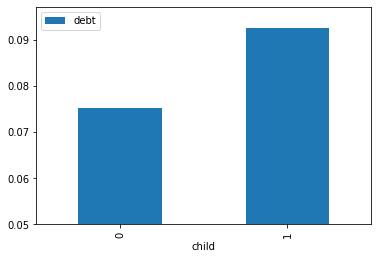

In [ ]:
chil.plot(x = 'child', y = 'debt', kind = 'bar', ylim = 0.05, )

Исследование зависимости между семейным положением и возвратом кредита в срок:
В процессе исследования обнаружено, что группа вдовцов имеет процент просрочек 6.5, что на 1.4% лучше среднего показателя среди этих групп, группа разведенных имеет процент просрочек 7.1, что на 0.9% лучше среднего показателя среди этих групп, группа женатых имеет процент просрочек 7.5, что на 0.5% лучше среднего показаталея среди этих групп, группа состоящих в гражданском браке имеет процент просрочек 9.3, что на 1.2% хуже среднего показателя среди этих групп, группа не женатых имеет процент просрочки 9.7, что на 1.6% хуже среднего показателя среди этих групп

In [ ]:
data_family.sort_values('debt', ascending = True)

,family_status,family_status_id,debt,diff
1,вдовец / вдова,2,0.065693,0.014958
0,в разводе,3,0.071130,0.009521
3,женат / замужем,0,0.075452,0.005199
2,гражданский брак,1,0.093471,-0.012820
4,не женат / не замужем,4,0.097509,-0.016858


Ниже представлен наглядный график зависимости процента выплат от семейного положения, где:
- женат / замужем
- гражданский брак
- гражданский брак
- женат / замужем
- не женат / не замужем

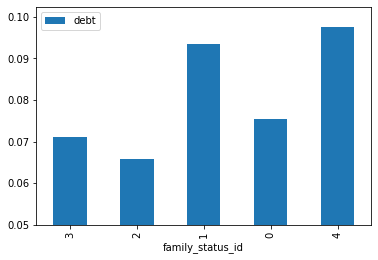

In [ ]:
data_family.plot(x = 'family_status_id', y = 'debt', kind = 'bar', ylim = 0.05)

Исследование влияния уровня дохода на процент возврата:
Уровень дохода был разделен на 4 группы:
средний - в диапазоне 100к - 200к, как основная группа по количеству участников (аналог среднего класса)
низший и высший, как 35-40% от количества участников среднего класса
наивысший, как имеющие несравнимо высокий заработок относительно остальных участников.
В процессе исследования было обнаружено, что самый высокий процент невозврата имеют люди, имеющие зарплату в диапазоне 100к - 200к (8.6%).
Здесь так же видно, что люди, имеющие зарплату более 900к не имеют просрочки по возврату, а 700к имеет аномальные относительное всего графика 16%    

Ниже представлен график зависимости % задержек от зарплаты, где y - процент задержек, x = уровень зарплат.

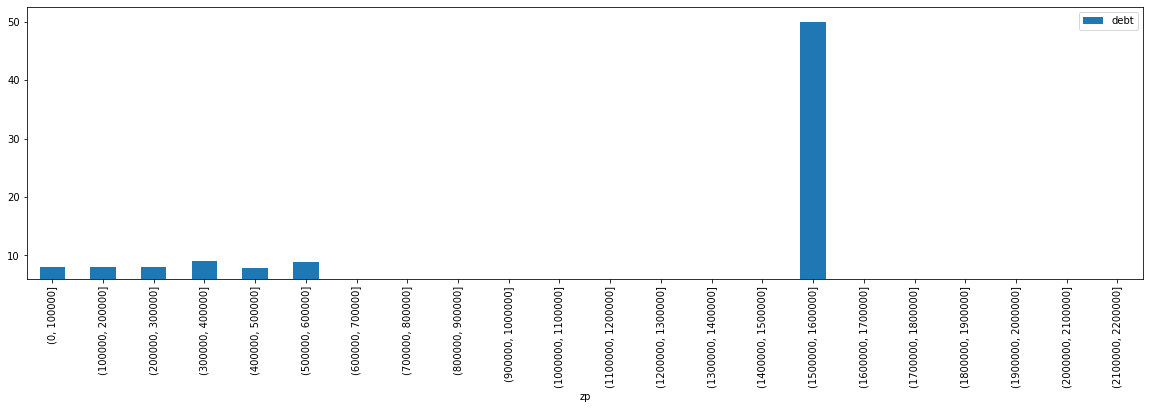

In [ ]:
data_money2.plot(x = 'zp', y = 'debt', figsize = (20, 5), kind = 'bar', ylim = 6)

Ниже представлен процент задержек по кредитам в зависимости от группы зарплат, где:
- зарплата более 600000 - наивысший
- зарплата в диапазоне 600000 - 200000 - высший
- зарплата в диапазоне 200000 - 100000 - средний
- зарплата менее 100000 - низший

In [ ]:
df.groupby('class')['debt'].mean() *100

class
высший       7.059298
наивысший    7.339450
низший       7.931884
средний      8.629654
Name: debt, dtype: float64

Ниже представлен процент задержек по кредитам в зависимости от цели кредита:

In [ ]:
df.groupby('purpose')['debt'].mean().sort_values(ascending = False) * 100

purpose
авто            9.378265
образование     9.220035
свадьба         8.003442
недвижимость    7.233373
Name: debt, dtype: float64

Причина данных значений возможно в том, что:
- на образование берут кредиты люди, которые в процессе обучения и сразу после его окончания имеют низкую зарплату;
- кредит на авто берут люди, имеющие низкий или нестабильный заработок (т.к. не имеют возможности накопить самостоятельно или же хотят иметь машину не соответствующую их достатку);
- кредит на свадьбу скорее всего возвращают муж и жена совместно;
- выплату по кредитам на недвижимость просрачивать опасно, т.к. это весьма дорогая вещь и, зачастую, единственное имеющееся жилье. Так же обычно к таким кредитам готовятся заранее и имеют стабильный заработок к моменту получения кредита.